In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px


In [53]:
df = pd.read_csv("/Users/furkandurmus/Desktop/IBM-Data-Sci-Project/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


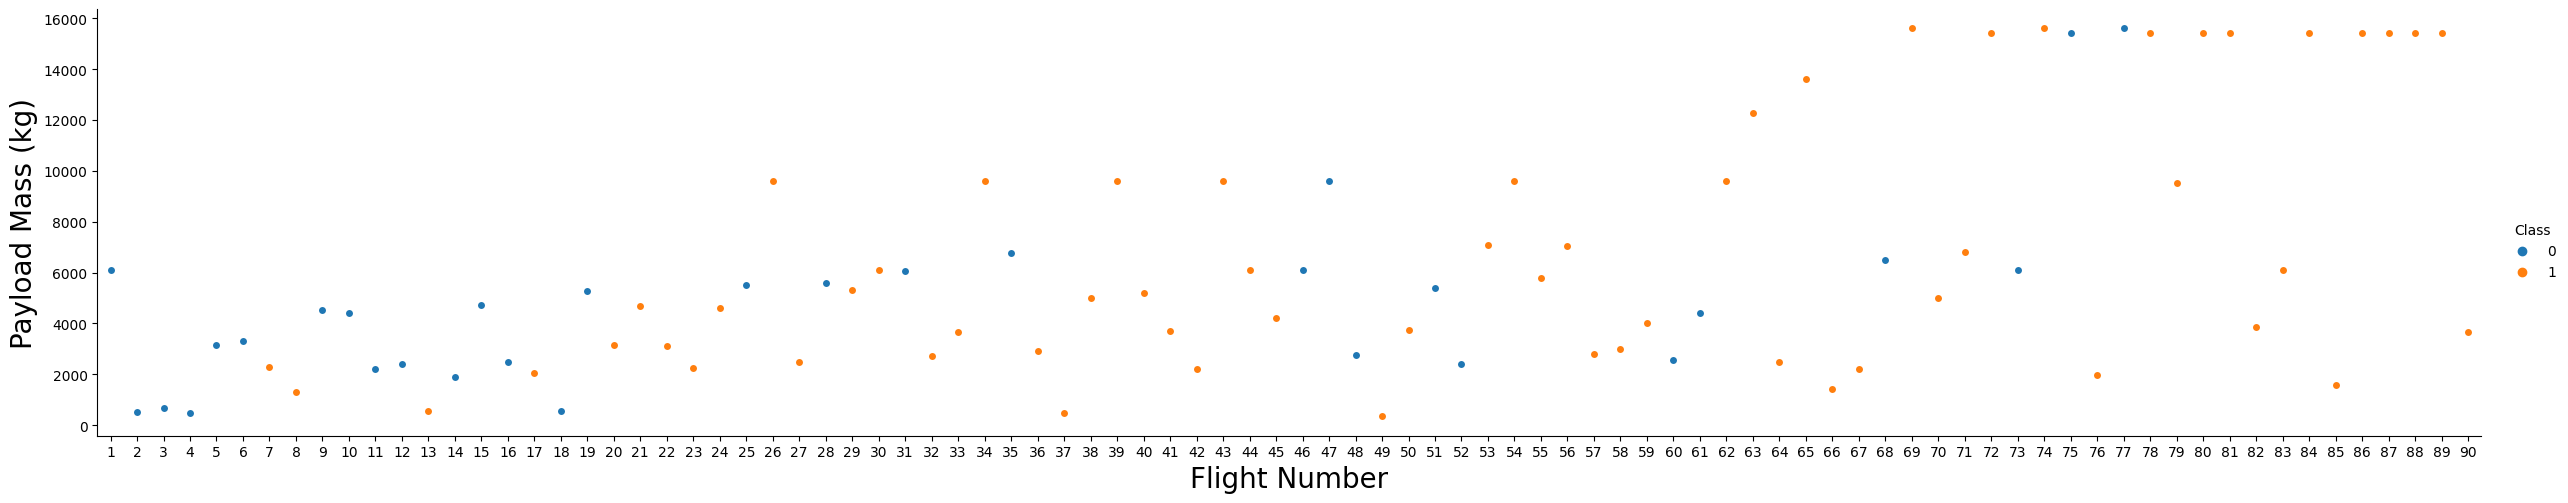

In [24]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


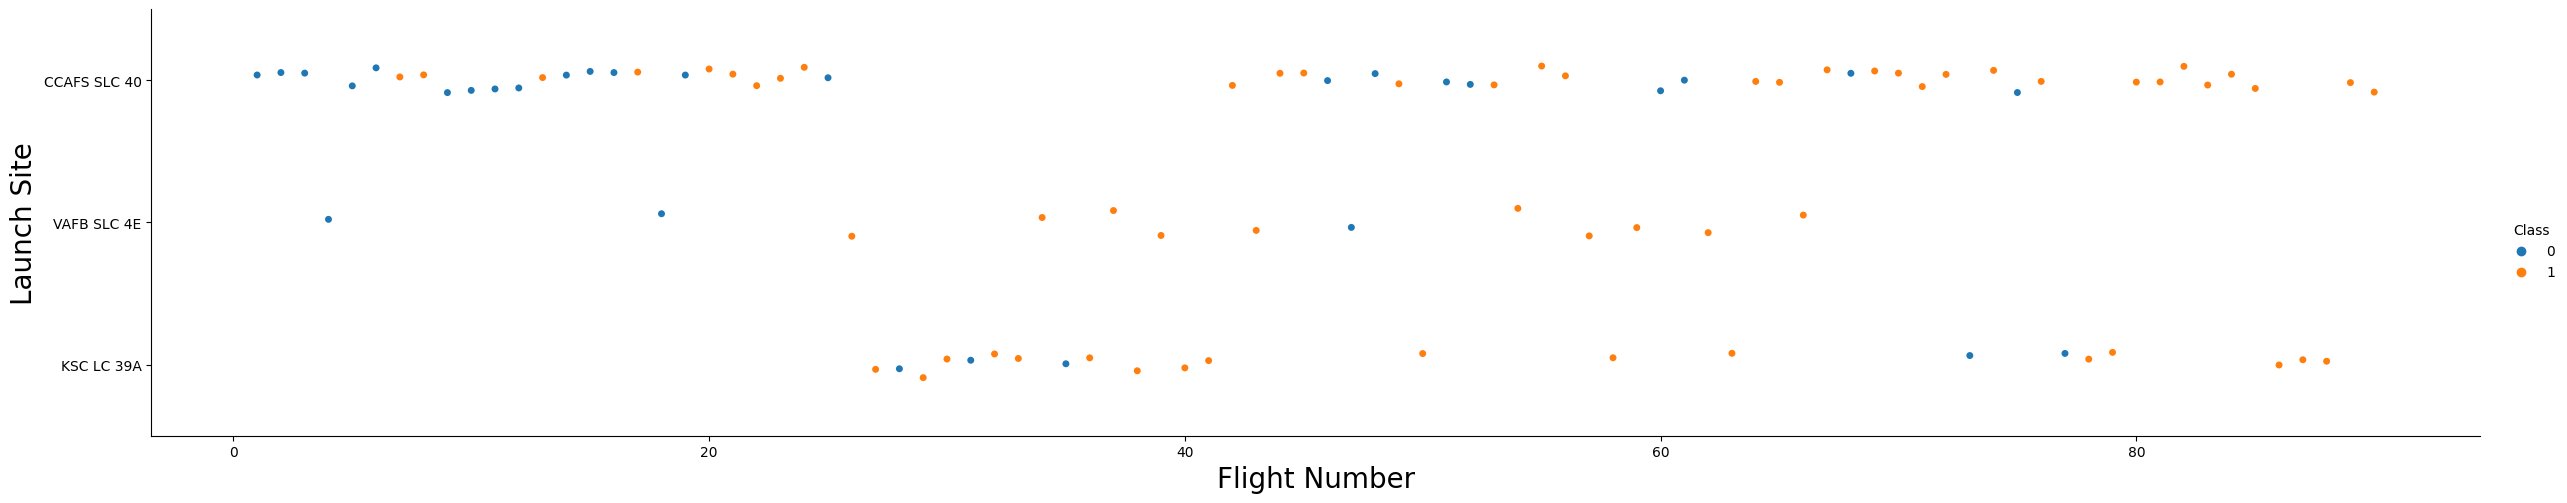

In [25]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


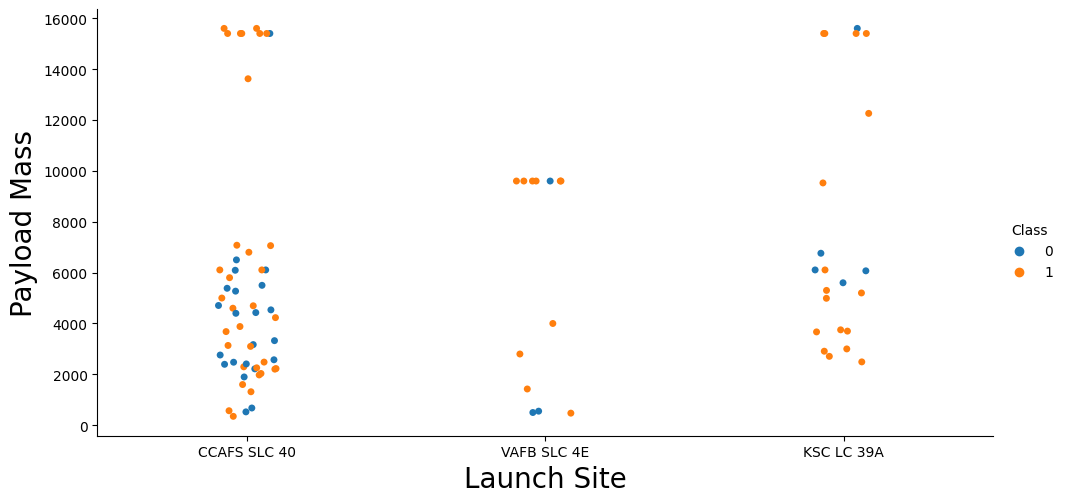

In [26]:
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect=2)
plt.xlabel("Launch Site", fontsize=20)
plt.ylabel("Payload Mass", fontsize=20)
plt.show()

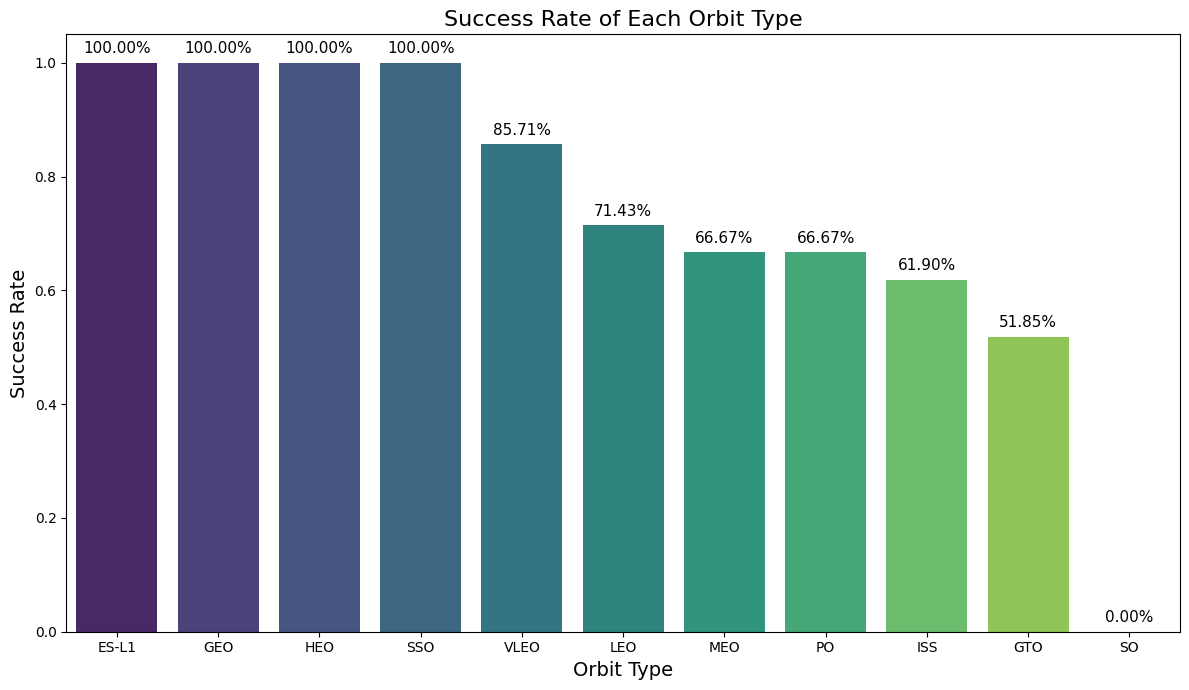

In [27]:
success_rates = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
plot = sns.barplot(x=success_rates.index, y=success_rates.values, palette='viridis')
plt.ylabel('Success Rate', fontsize=14)
plt.xlabel('Orbit Type', fontsize=14)
plt.title('Success Rate of Each Orbit Type', fontsize=16)

# Her bir bar için yüzdelik değeri ekleyelim
for p in plot.patches:
    plot.annotate(f"{p.get_height() * 100:.2f}%",
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=11, color='black', xytext=(0,10),
                  textcoords='offset points')
plt.tight_layout()
plt.savefig("bar_chart.png")
plt.show()



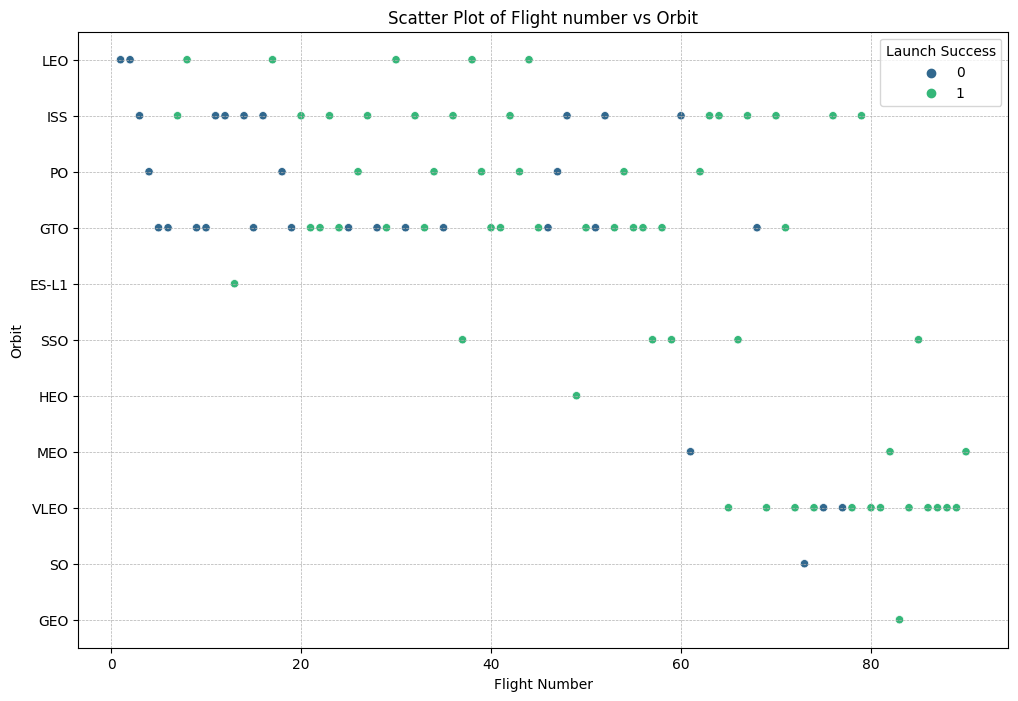

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(data= df, x="FlightNumber", y="Orbit", hue="Class", palette="viridis")

plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.title('Scatter Plot of Flight number vs Orbit')
plt.legend(title="Launch Success")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

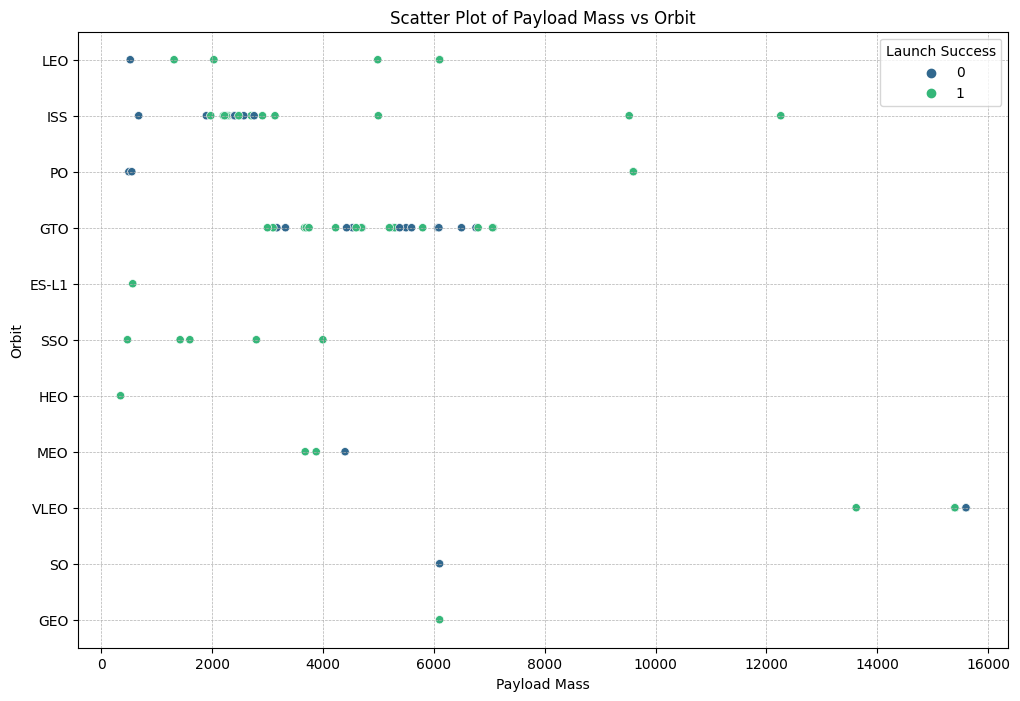

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(data= df, x="PayloadMass", y="Orbit", hue="Class", palette="viridis")

plt.xlabel("Payload Mass")
plt.ylabel("Orbit")
plt.title('Scatter Plot of Payload Mass vs Orbit')
plt.legend(title="Launch Success")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [58]:
years = [ ]
def Extract_year(dates): 
    for i in dates:
        years.append(i.split("-")[0])
    return years

# Önceki yılları temizle
if 'Year' in df.columns:
    df.drop('Year', axis=1, inplace=True)

# Yılları çıkarma fonksiyonunu kullanarak yılları elde et
df["Year"] = Extract_year(df["Date"])


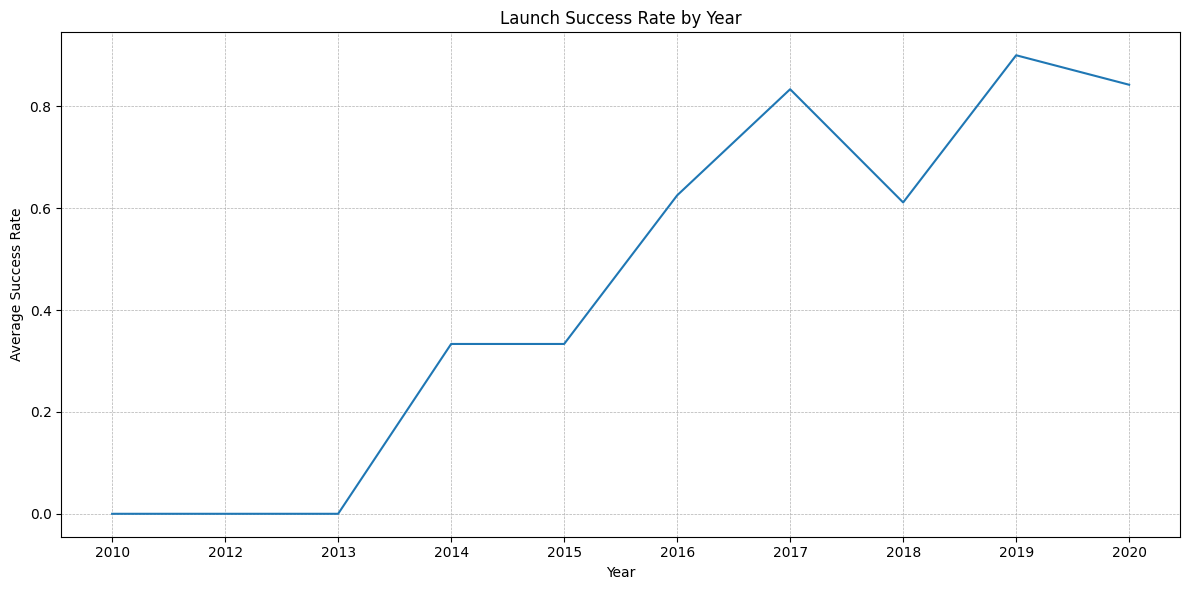

In [60]:
success_rate_by_year = df.groupby('Year')['Class'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=success_rate_by_year)

plt.title("Launch Success Rate by Year")
plt.xlabel("Year")
plt.ylabel("Average Success Rate")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

plt.show()


In [61]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [63]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
features_one_hot = features_one_hot.astype("float64")

In [65]:
features_one_hot.to_csv("dataset_part3.csv", index=False)

In [69]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         